# 1. My First iPython Notebook

## I will use this notebook to do EDA of the PAMAP2 Physical Activity Monitoring Data Set

The data set I am using is the [PAMAP2 Physical Acitivity Monitoring Data Set from the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring). First I will load the required libraries.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For now I will just look at the protocol data and worry about the optional data later. First I will practice using pandas to look at the first person's data file.  

In [156]:
df101 = pd.read_csv('../PAMAP2_Dataset/Protocol/subject101.dat', delim_whitespace=True, header=None, index_col=0)

Without the *delim_whitespace* option, the whole row is read as a single column. Setting *header* to none prevents the first row (which is actual data) from being used as the header. Lastly, setting *index_col* to zero chooses the first column (the timestamp) to be used as the dataframe index.

<hr style="border-top: 3px solid ##000000; background: transparent;">

## 1.1 Adding labels to the data

Now I will rename the columns of the dataframe to make them human-readable.

In [157]:
df101.columns = ['activityID',
'HR',
'hTemp',
'hAcc16X',
'hAcc16Y',
'hAcc16Z',
'hAcc06X',
'hAcc06Y',
'hAcc06Z',
'hGyroX',
'hGyroY',
'hGyroZ',
'hMagX',
'hMagY',
'hMagZ',
'hOrient1',
'hOrient2',
'hOrient3',
'hOrient4',
'cTemp',
'cAcc16X',
'cAcc16Y',
'cAcc16Z',
'cAcc06X',
'cAcc06Y',
'cAcc06Z',
'cGyroX',
'cGyroY',
'cGyroZ',
'cMagX',
'cMagY',
'cMagZ',
'cOrient1',
'cOrient2',
'cOrient3',
'cOrient4',
'aTemp',
'aAcc16X',
'aAcc16Y',
'aAcc16Z',
'aAcc06X',
'aAcc06Y',
'aAcc06Z',
'aGyroX',
'aGyroY',
'aGyroZ',
'aMagX',
'aMagY',
'aMagZ',
'aOrient1',
'aOrient2',
'aOrient3',
'aOrient4']

In [158]:
df101.index.names=['Timestamp']

In [7]:
df101.head()

,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hAcc06X,hAcc06Y,hAcc06Z,hGyroX,...,aGyroX,aGyroY,aGyroZ,aMagX,aMagY,aMagZ,aOrient1,aOrient2,aOrient3,aOrient4
Timestamp,,,,,,,,,,,,,,,,,,,,,
8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


In [69]:
df101.tail()

,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hAcc06X,hAcc06Y,hAcc06Z,hGyroX,hGyroY,hGyroZ,hMagX,hMagY,hMagZ,hOrient1,hOrient2,hOrient3,hOrient4,cTemp,cAcc16X,cAcc16Y,cAcc16Z,cAcc06X,cAcc06Y,cAcc06Z,cGyroX,cGyroY,cGyroZ,cMagX,cMagY,cMagZ,cOrient1,cOrient2,cOrient3,cOrient4,aTemp,aAcc16X,aAcc16Y,aAcc16Z,aAcc06X,aAcc06Y,aAcc06Z,aGyroX,aGyroY,aGyroZ,aMagX,aMagY,aMagZ,aOrient1,aOrient2,aOrient3,aOrient4
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3772.50,0,NaN,30.5,2.02477,7.29553,5.74194,2.06573,6.57692,5.92695,1.51616,-0.044713,-0.085853,18.8018,-48.7508,-32.9591,1.0,0.0,0.0,0.0,34.0625,-0.414842,9.65041,-1.85519,-0.382686,9.71142,-1.50051,0.010358,0.001925,0.008888,12.6211,-39.1506,29.6394,1.0,0.0,0.0,0.0,33.3125,9.89247,-0.404788,-0.027988,9.82743,-0.315490,0.290320,0.048745,-0.008034,0.018600,-58.8381,-36.2397,-11.0980,1.0,0.0,0.0,0.0
3772.51,0,NaN,30.5,2.10836,7.86504,5.85674,2.08754,7.42244,5.87977,1.54223,-0.023898,-0.075649,17.6871,-49.0142,-32.8335,1.0,0.0,0.0,0.0,34.0625,-0.412156,9.80154,-1.77819,-0.412319,9.71138,-1.42477,-0.005754,-0.017235,0.020260,13.4054,-38.9579,30.1418,1.0,0.0,0.0,0.0,33.3125,9.77339,-0.440118,-0.260527,9.82756,-0.300328,0.320541,0.042113,0.024647,0.013375,-58.9537,-36.3379,-11.7170,1.0,0.0,0.0,0.0
3772.52,0,NaN,30.5,2.07163,8.39581,5.77742,2.13833,8.05640,5.90853,1.50239,-0.029592,-0.074682,18.0358,-49.4800,-32.0324,1.0,0.0,0.0,0.0,34.0625,-0.330507,9.68963,-1.58274,-0.457713,9.71155,-1.46983,-0.025546,-0.014674,0.014223,12.6503,-39.8142,28.7809,1.0,0.0,0.0,0.0,33.3125,9.81482,-0.517578,-0.105264,9.81240,-0.360868,0.290545,-0.014889,0.026009,0.025054,-59.1781,-35.8985,-10.9678,1.0,0.0,0.0,0.0
3772.53,0,NaN,30.5,2.19569,8.77634,6.00892,2.11251,8.53989,5.93770,1.33222,-0.052372,-0.034189,17.9474,-49.9265,-30.7632,1.0,0.0,0.0,0.0,34.0625,-0.299255,9.68796,-1.81450,-0.502268,9.78709,-1.45423,0.004272,-0.012992,-0.019539,12.6467,-39.9370,30.0064,1.0,0.0,0.0,0.0,33.3125,9.85194,-0.365619,-0.144416,9.84249,-0.391093,0.305618,0.047026,-0.035531,0.024640,-58.8299,-36.6845,-10.8553,1.0,0.0,0.0,0.0
3772.54,0,NaN,30.5,2.14774,8.66047,5.73918,2.15810,8.59995,5.92242,1.20910,-0.070005,-0.018819,17.7419,-50.5808,-29.7263,1.0,0.0,0.0,0.0,34.0625,-0.183667,9.72552,-1.77381,-0.442102,9.78695,-1.45459,-0.023705,-0.048317,-0.019038,13.4402,-39.8485,29.6508,1.0,0.0,0.0,0.0,33.3125,9.85084,-0.365298,-0.183018,9.82756,-0.300328,0.320541,0.042585,0.017541,-0.037894,-59.1707,-36.7731,-11.5961,1.0,0.0,0.0,0.0


<hr style="border-top: 3px solid ##000000; background: transparent;">

## 1.2 Cleaning the data

Now I want to drop data that the dataset [README](https://archive.ics.uci.edu/ml/machine-learning-databases/00231/readme.pdf) recommended against (e.g. the 6g scale IMU data) and data that is invalid (the orientation data and the data with **activityID** of 0). I will store this cleaned up version of the dataframe in a new dataframe called *df101_clean*.

In [159]:
df101_clean = df101.drop(['hAcc06X','hAcc06Y','hAcc06Z','cAcc06X','cAcc06Y','cAcc06Z','aAcc06X','aAcc06Y','aAcc06Z'],axis=1)

Now I will change the settings show that all columns will be displayed.

In [160]:
pd.set_option('display.max_columns', 100)

In [90]:
df101_clean.head()

,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hGyroX,hGyroY,hGyroZ,hMagX,hMagY,hMagZ,hOrient1,hOrient2,hOrient3,hOrient4,cTemp,cAcc16X,cAcc16Y,cAcc16Z,cGyroX,cGyroY,cGyroZ,cMagX,cMagY,cMagZ,cOrient1,cOrient2,cOrient3,cOrient4,aTemp,aAcc16X,aAcc16Y,aAcc16Z,aGyroX,aGyroY,aGyroZ,aMagX,aMagY,aMagZ,aOrient1,aOrient2,aOrient3,aOrient4
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8.38,0,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
8.39,0,NaN,30.0,2.18837,8.56560,3.66179,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
8.40,0,NaN,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
8.41,0,NaN,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
8.42,0,NaN,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


In [161]:
df101_clean.drop(['hOrient1','hOrient2','hOrient3','hOrient4','cOrient1','cOrient2','cOrient3','cOrient4','aOrient1','aOrient2','aOrient3','aOrient4'],axis=1,inplace=True)

This time I used the **inplace** option to make the change permanent.

In [18]:
df101_clean.head()

,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hGyroX,hGyroY,hGyroZ,hMagX,hMagY,hMagZ,cTemp,cAcc16X,cAcc16Y,cAcc16Z,cGyroX,cGyroY,cGyroZ,cMagX,cMagY,cMagZ,aTemp,aAcc16X,aAcc16Y,aAcc16Z,aGyroX,aGyroY,aGyroZ,aMagX,aMagY,aMagZ
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37.66,1,NaN,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
37.67,1,NaN,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
37.68,1,NaN,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
37.69,1,NaN,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


In [162]:
df101_clean = df101_clean[df101_clean.activityID != 0]

Now I will study how much of the dataset is missing (NaN). First, what are the dimensions of our data?

In [163]:
df101_clean.shape

(249957, 32)

The below command checks which columns of the data have missing values.

In [25]:
df101_clean.isnull().any()

activityID    False
HR             True
hTemp          True
hAcc16X        True
hAcc16Y        True
hAcc16Z        True
hGyroX         True
hGyroY         True
hGyroZ         True
hMagX          True
hMagY          True
hMagZ          True
cTemp          True
cAcc16X        True
cAcc16Y        True
cAcc16Z        True
cGyroX         True
cGyroY         True
cGyroZ         True
cMagX          True
cMagY          True
cMagZ          True
aTemp          True
aAcc16X        True
aAcc16Y        True
aAcc16Z        True
aGyroX         True
aGyroY         True
aGyroZ         True
aMagX          True
aMagY          True
aMagZ          True
dtype: bool

To count the total number of NaN entries:

In [26]:
df101_clean.isnull().sum().sum()

254931

Below shows some of the rows with NaN entries in columns other than the HR column.

In [32]:
df101_clean[df101_clean['hTemp'].isnull()]

,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hGyroX,hGyroY,hGyroZ,hMagX,hMagY,hMagZ,cTemp,cAcc16X,cAcc16Y,cAcc16Z,cGyroX,cGyroY,cGyroZ,cMagX,cMagY,cMagZ,aTemp,aAcc16X,aAcc16Y,aAcc16Z,aGyroX,aGyroY,aGyroZ,aMagX,aMagY,aMagZ
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200.31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.2500,5.224570,5.75385,3.719300,0.206824,1.407400,-0.016951,8.99881,-23.3671,-57.7924,31.8750,0.583433,-1.327890,-10.073800,0.230396,-0.030559,0.038560,-23.6012,35.75320,24.16350
200.32,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.2500,5.020720,5.48802,3.290540,-0.047491,1.215060,-0.018778,10.45620,-23.0919,-56.5441,31.8750,0.253883,-0.985644,-9.886390,0.281307,-0.010447,0.038095,-23.5053,36.20730,22.92980
200.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.2500,5.078180,4.58914,4.030200,-0.243069,1.030740,0.026626,9.88947,-22.9533,-57.4106,31.8750,-0.159914,-0.754261,-10.007800,0.167221,-0.010167,0.060642,-23.6319,37.31330,23.06640
349.90,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.8125,1.419620,5.29463,-10.287700,-0.086471,0.051301,0.131065,12.77920,-61.3704,39.4180,32.5000,7.727030,4.658980,-4.750960,-0.246093,-0.166037,-0.012016,-89.6154,9.68069,19.35040
468.37,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.1250,0.589246,9.99771,-0.134408,0.094483,0.000514,0.006674,13.52300,-64.8156,-38.5350,32.8750,8.681780,2.822200,-3.726440,0.035428,-0.023188,0.001880,-86.7295,20.69630,21.30100
468.38,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.1250,0.627161,9.92229,-0.133476,0.088686,-0.018884,-0.005627,12.97480,-65.3559,-38.5440,32.8750,8.717600,2.936510,-3.803960,0.018273,-0.028101,0.015968,-86.8473,21.24880,21.55540
468.39,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.1250,0.660900,9.99644,-0.287989,0.037158,-0.041331,0.002941,13.08200,-65.1338,-38.7872,32.8750,8.711200,2.976410,-4.035810,0.013278,0.002851,0.006793,-86.0562,20.34820,20.79660
537.69,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3125,0.822728,9.50013,-1.212750,0.045683,-0.013799,0.018182,10.71050,-67.3856,-28.2846,33.0000,8.857930,2.405930,-4.030770,0.302416,-0.075486,-0.182238,-86.5313,40.25030,10.36780
537.70,2,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3125,0.940602,9.53820,-1.094570,0.029024,0.013125,0.022294,10.37540,-67.1307,-30.4957,33.0000,8.787370,2.595290,-3.916900,0.265436,-0.160172,-0.242210,-86.1678,38.57630,10.84210


Below counts the percentage of each column's entries which are missing (thanks to [Chiu-Yun Lin](https://github.com/kcmeehan/BiometricsActivityClassification/blob/cylin/explore_subject101.ipynb)).

In [164]:
df101_clean.drop(['hGyroX','hGyroY','hGyroZ','cGyroX','cGyroY','cGyroZ','aGyroX','aGyroY','aGyroZ'], axis=1, inplace=True)

In [173]:
nRows, nCols = df101_clean.shape
df101_clean.isnull().sum()/nRows*100

activityID     0.000000
HR            90.860062
hTemp          0.543315
hAcc16X        0.543315
hAcc16Y        0.543315
hAcc16Z        0.543315
hMagX          0.543315
hMagY          0.543315
hMagZ          0.543315
cTemp          0.130428
cAcc16X        0.130428
cAcc16Y        0.130428
cAcc16Z        0.130428
cMagX          0.130428
cMagY          0.130428
cMagZ          0.130428
aTemp          0.439293
aAcc16X        0.439293
aAcc16Y        0.439293
aAcc16Z        0.439293
aMagX          0.439293
aMagY          0.439293
aMagZ          0.439293
dtype: float64

In [174]:
x = []
y = df101_clean.index
for i in range (0, nRows):
    x.append(i)    

Check for gaps in time.

[149600, 149800, 1900, 2400]

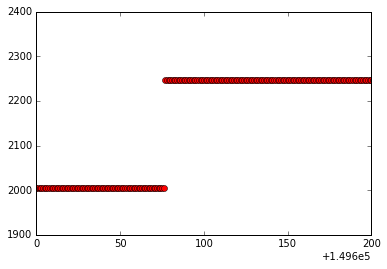

In [179]:
plt.plot(x, y,'ro')
plt.axis([149600,149800,1900,2400])

Remove the first and last 10 seconds of each subject's data.

In [182]:
df101_clean.iloc[149600:149700]


,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hMagX,hMagY,hMagZ,cTemp,cAcc16X,cAcc16Y,cAcc16Z,cMagX,cMagY,cMagZ,aTemp,aAcc16X,aAcc16Y,aAcc16Z,aMagX,aMagY,aMagZ
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
2005.12,13,NaN,33.625,2.70428,6.18203,4.87067,-11.497500,-16.6898,-53.9078,37.0000,-0.328219,9.69015,-1.50526,31.200100,-42.9427,-14.4571,34.875,9.81150,1.374020,0.731934,-17.5061,15.7107,-20.289100
2005.13,13,131.0,33.625,2.62441,6.71175,4.63676,-11.613300,-17.1168,-54.0268,37.0000,-0.325433,9.87894,-1.42838,31.961000,-41.9603,-14.6894,34.875,9.77438,1.222060,0.771086,-17.7355,15.9427,-20.532400
2005.14,13,NaN,33.625,2.71255,7.54751,4.82770,-10.634200,-17.5938,-55.2005,37.0000,-0.210392,10.14220,-1.42716,31.622900,-42.1803,-13.8367,34.875,9.70173,1.221900,0.847521,-17.1795,16.2540,-20.533600
2005.15,13,NaN,33.625,3.05718,8.37921,4.79157,-10.499900,-18.1619,-53.9351,37.0000,-0.254126,10.17860,-1.62167,31.752200,-42.5142,-14.4481,34.875,9.85112,1.373140,0.809525,-17.8357,15.1724,-20.416000
2005.16,13,NaN,33.625,3.34238,8.22109,4.33452,-10.278400,-17.5190,-54.1622,37.0000,-0.150327,9.64905,-1.92784,31.860500,-42.5257,-13.5885,34.875,9.66580,1.297750,0.885271,-17.9556,15.7282,-20.409100
2005.17,13,NaN,33.625,3.36708,7.87667,4.02816,-10.600700,-18.8179,-53.2467,37.0000,-0.147693,9.34860,-1.81065,31.846800,-42.0749,-13.9558,34.875,9.66520,1.183840,0.885972,-17.8547,16.1740,-21.024000
2005.18,13,NaN,33.625,3.38535,7.75786,3.49001,-9.955870,-18.1845,-54.6360,37.0000,-0.215617,9.46362,-1.54121,32.208100,-42.5273,-14.6864,34.875,9.70373,1.183280,0.924960,-18.0682,15.6250,-20.656800
2005.19,13,NaN,33.625,3.22670,7.83289,3.25645,-10.715600,-18.0451,-53.5842,37.0000,-0.283640,9.54097,-1.27164,32.681600,-43.1030,-14.5574,34.875,9.63238,1.220760,1.039760,-17.8470,15.8379,-20.656300
2005.20,13,NaN,33.625,2.86619,7.84017,3.75136,-9.716250,-18.1000,-53.8277,37.0000,-0.410466,9.57614,-1.69999,31.889300,-42.9546,-15.6724,34.875,9.66560,1.259780,0.885505,-18.0666,15.5147,-20.658000


In [169]:
df101_clean.drop(df101_clean.index[:10], inplace=True)
df101_clean.head()


,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hMagX,hMagY,hMagZ,cTemp,cAcc16X,cAcc16Y,cAcc16Z,cMagX,cMagY,cMagZ,aTemp,aAcc16X,aAcc16Y,aAcc16Z,aMagX,aMagY,aMagZ
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
37.76,1,NaN,30.375,2.36727,7.63436,5.74593,8.83009,-67.8239,-19.5102,32.1875,0.199667,9.68719,-1.68929,1.384190,-51.3107,44.0392,30.75,9.72955,-1.88301,-0.213433,-60.7654,-37.5326,-58.7509
37.77,1,NaN,30.375,2.43617,7.63210,5.55453,9.38116,-67.3058,-19.9739,32.1875,0.198722,9.76224,-1.72828,0.692158,-50.9501,43.7840,30.75,9.62336,-1.77000,-0.022276,-60.4345,-36.6732,-57.8780
37.78,1,NaN,30.375,2.28661,7.67154,5.59065,9.13271,-67.8206,-21.1339,32.1875,0.309435,9.68580,-1.84218,0.795535,-50.7334,44.1536,30.75,9.70202,-1.88566,0.133607,-60.8735,-37.5353,-58.2549
37.79,1,NaN,30.375,2.21585,7.59758,5.74378,8.49822,-67.6974,-19.3894,32.1875,0.236837,9.76212,-1.72759,0.444141,-50.2668,43.2909,30.75,9.62686,-1.73299,0.093299,-61.6630,-37.1766,-58.2446
37.80,1,NaN,30.375,2.24722,7.44419,5.59082,8.70432,-67.9165,-20.2042,32.1875,0.244644,9.68863,-1.45616,0.691398,-50.9511,43.9066,30.75,9.54792,-1.88343,-0.022345,-60.5397,-37.6509,-58.7540


In [170]:
df101_clean.tail(15)

,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hMagX,hMagY,hMagZ,cTemp,cAcc16X,cAcc16Y,cAcc16Z,cMagX,cMagY,cMagZ,aTemp,aAcc16X,aAcc16Y,aAcc16Z,aMagX,aMagY,aMagZ
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
3626.23,24,NaN,30.1875,2.19034,8.58564,5.89402,-46.4895,-53.8264,-20.6932,33.875,0.115431,9.68561,-1.96186,-37.5717,-59.6173,7.15384,33.1875,9.65217,2.07294,-1.049160,-55.8952,-29.2057,33.5133
3626.24,24,NaN,30.1875,1.96360,8.77675,5.85149,-45.5903,-53.8829,-20.3569,33.875,0.113243,9.72275,-2.03946,-37.4820,-58.9498,7.15610,33.1875,9.53850,1.80788,-1.048680,-56.7803,-29.7327,34.0100
3626.25,24,NaN,30.1875,2.00059,8.66264,5.85243,-46.2522,-53.7403,-20.0006,33.875,0.342230,9.83500,-2.03568,-36.8170,-58.5263,7.28934,33.1875,9.65098,1.84513,-1.047760,-56.3244,-29.6530,35.1211
3626.26,24,NaN,30.1875,1.80033,8.44380,6.65840,-45.1462,-54.8893,-20.2571,33.875,0.239025,9.72498,-1.64998,-37.3674,-59.0699,7.64799,33.1875,9.58062,2.07246,-0.934120,-54.9789,-29.9161,34.7360
3626.27,24,NaN,30.1875,1.89142,8.75008,7.04361,-46.6132,-54.4661,-21.1616,33.875,0.279973,9.49972,-1.53235,-37.9256,-59.5071,8.61955,33.1875,9.65236,2.11091,-1.049390,-55.9992,-29.4308,34.1306
3626.28,24,NaN,30.1875,1.78098,9.35765,7.00142,-45.7088,-54.4171,-20.5928,33.875,0.236984,9.38585,-1.68764,-36.4595,-58.9841,7.17157,33.1875,9.43142,1.95918,-0.896357,-56.1098,-29.3215,34.5040
3626.29,24,NaN,30.1875,1.92037,9.39140,6.65700,-45.6979,-53.0062,-20.3463,33.875,0.315401,9.34847,-1.60865,-36.4444,-59.4327,7.29377,33.1875,9.35327,1.96061,-1.012940,-56.2158,-29.7590,34.5002
3626.30,24,183.0,30.1875,2.09943,8.74364,6.50792,-46.0392,-53.9642,-20.4684,33.875,0.041836,9.38540,-1.84606,-37.3777,-58.8495,8.01586,33.1875,9.43001,2.11169,-0.974497,-55.5482,-29.5586,34.2493
3626.31,24,NaN,30.1875,2.30399,8.24398,5.97385,-46.1446,-54.6169,-20.0113,33.875,-0.077928,9.49742,-2.04219,-37.1413,-58.8439,6.54852,33.1875,9.50627,1.95870,-0.895587,-56.3386,-29.1983,34.1359


In [171]:
dftest = df101_clean.drop(df101_clean.index[-10:])
len(dftest)

249937

In [172]:
dftest.tail()

,activityID,HR,hTemp,hAcc16X,hAcc16Y,hAcc16Z,hMagX,hMagY,hMagZ,cTemp,cAcc16X,cAcc16Y,cAcc16Z,cMagX,cMagY,cMagZ,aTemp,aAcc16X,aAcc16Y,aAcc16Z,aMagX,aMagY,aMagZ
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
3626.23,24,NaN,30.1875,2.19034,8.58564,5.89402,-46.4895,-53.8264,-20.6932,33.875,0.115431,9.68561,-1.96186,-37.5717,-59.6173,7.15384,33.1875,9.65217,2.07294,-1.04916,-55.8952,-29.2057,33.5133
3626.24,24,NaN,30.1875,1.96360,8.77675,5.85149,-45.5903,-53.8829,-20.3569,33.875,0.113243,9.72275,-2.03946,-37.4820,-58.9498,7.15610,33.1875,9.53850,1.80788,-1.04868,-56.7803,-29.7327,34.0100
3626.25,24,NaN,30.1875,2.00059,8.66264,5.85243,-46.2522,-53.7403,-20.0006,33.875,0.342230,9.83500,-2.03568,-36.8170,-58.5263,7.28934,33.1875,9.65098,1.84513,-1.04776,-56.3244,-29.6530,35.1211
3626.26,24,NaN,30.1875,1.80033,8.44380,6.65840,-45.1462,-54.8893,-20.2571,33.875,0.239025,9.72498,-1.64998,-37.3674,-59.0699,7.64799,33.1875,9.58062,2.07246,-0.93412,-54.9789,-29.9161,34.7360
3626.27,24,NaN,30.1875,1.89142,8.75008,7.04361,-46.6132,-54.4661,-21.1616,33.875,0.279973,9.49972,-1.53235,-37.9256,-59.5071,8.61955,33.1875,9.65236,2.11091,-1.04939,-55.9992,-29.4308,34.1306
